In [17]:
import pandas as pd
car = pd.read_excel('/kaggle/input/complex-compound-sentiment-analysis/BANGLA-ABSA Unique Aspect Based Sentiment Analysis datasets in Bangla Language/BANGLA_ABSA dataset/Car_ABSA.xlsx')
mobile = pd.read_excel("/kaggle/input/complex-compound-sentiment-analysis/BANGLA-ABSA Unique Aspect Based Sentiment Analysis datasets in Bangla Language/BANGLA_ABSA dataset/Mobile_phone_ABSA.xlsx")
movie = pd.read_excel("/kaggle/input/complex-compound-sentiment-analysis/BANGLA-ABSA Unique Aspect Based Sentiment Analysis datasets in Bangla Language/BANGLA_ABSA dataset/Movie_ABSA.xlsx")
restaurant = pd.read_excel("/kaggle/input/complex-compound-sentiment-analysis/BANGLA-ABSA Unique Aspect Based Sentiment Analysis datasets in Bangla Language/BANGLA_ABSA dataset/Restaurant_ABSA.xlsx")

In [18]:
combined_df = pd.concat([car, mobile, movie, restaurant], ignore_index=True)
combined_df

,Id,Comment,"{Aspect category, Sentiment Polarity}"
0,1,হ্যান্ডব্রেকটা নষ্ট হয়ে গেছে কিন্তু নরমাল ব্রে...,"{safety, negative}, {safety, positive}"
1,2,লেদার সিটগুলা খুব একটা কমফরটেবল না হলেও গাড়িটা...,"{comfort, negative}, {interior, positive}"
2,3,গাড়িটায় একদম নিউ কালার করা হয়েছে কিন্তু এই কাল...,"{exterior, positive}, {exterior, negative}"
3,4,ইঞ্জিনে পারফরমেন্স হেডার লাগানো আছে কিন্তু ইন্...,"{performance, positive}, {performance, negative}"
4,5,সামনের সিটে কম হেডরুম কিন্তু পিছনে আরো বেটার হ...,"{comfort, negative}, {comfort, positive}"
...,...,...,...
3720,797,"মাংসের আইটেম শুধু চর্বি ও চর্বি, তবে দাম একটু ...","{food, negative}, {price, negative}"
3721,798,"রেস্তোরাঁর ম্যানেজমেন্ট ভালোভাবে চালাতে জানে, ...","{miscellaneous, positive}, {service, positive}"
3722,799,এই রেস্তোরাঁর খাবার ভালো হলেও কর্মীরা খুব একটা...,"{food, positive}, {miscellaneous, negative}"
3723,800,আমি এর আগে ওয়েটারদের কাছ থেকে এত দুর্দান্ত পর...,"{service, positive}, {food, positive}"


In [19]:
combined_df = combined_df.drop(columns=['Id'])

In [20]:
combined_df.head()

,Comment,"{Aspect category, Sentiment Polarity}"
0,হ্যান্ডব্রেকটা নষ্ট হয়ে গেছে কিন্তু নরমাল ব্রে...,"{safety, negative}, {safety, positive}"
1,লেদার সিটগুলা খুব একটা কমফরটেবল না হলেও গাড়িটা...,"{comfort, negative}, {interior, positive}"
2,গাড়িটায় একদম নিউ কালার করা হয়েছে কিন্তু এই কাল...,"{exterior, positive}, {exterior, negative}"
3,ইঞ্জিনে পারফরমেন্স হেডার লাগানো আছে কিন্তু ইন্...,"{performance, positive}, {performance, negative}"
4,সামনের সিটে কম হেডরুম কিন্তু পিছনে আরো বেটার হ...,"{comfort, negative}, {comfort, positive}"


In [21]:
print(combined_df.columns)

Index(['Comment', '{Aspect category,   Sentiment Polarity}'], dtype='object')


In [22]:
import pandas as pd
import re

# Define the list of Bangla conjunctions
bangla_conjunctions = [
    "এবং", "আর", "অথবা", "কিংবা", "কিন্তু", "তবে", "অথচ", "তবু", 
    "যদি", "যেহেতু", "যেন", "যতক্ষণ", "তাই", "কারণ", "যতই", 
    "যদি না", "যদিও", "এমনকি", "অতএব", "তথাপি", "হলেও", "থাকলেও",
    "তাও", "হলেও", "বাট", ",", "সত্তেও", "উইথ", "অ্যান্ড", "তবুও", "বরং", "করলেও",
    "পরও", "লাগলেও", "এছাড়া", "আবার", "কিংবা", "কারন", "কারণে", "অথচ", "পারলেও",
    "অর", "যদি", " বা ", "এছাড়া", 
]

# Convert the list into a regex pattern
conjunction_pattern = "|".join(map(re.escape, bangla_conjunctions))

# Function to process each comment and map splits with aspect-sentiment pairs
def process_comment(row):
    # Split the comment based on conjunctions
    parts = re.split(conjunction_pattern, row['Comment'])
    
    # Clean up and split the {Aspect category, Sentiment Polarity} column
    aspect_sentiment_pairs = row['{Aspect category,   Sentiment Polarity}'].replace('{', '').replace('}', '').split(', ')
    
    # Check if there are 2 or more parts and at least 4 aspect-sentiment pairs
    if len(parts) >= 2 and len(aspect_sentiment_pairs) >= 4:
        result = []
        for i in range(2):  # We only want to use the first two parts
            if i * 2 + 1 < len(aspect_sentiment_pairs):  # Ensure we don't go out of bounds
                aspect = aspect_sentiment_pairs[i*2].strip()  # Aspect
                sentiment = aspect_sentiment_pairs[i*2+1].strip()  # Sentiment
                formatted_row = [parts[i].strip(), aspect, sentiment]  # Split comment + aspect + sentiment
                result.append(formatted_row)
        return result
    return []

# Apply the function to the 'Comment' column
expanded_rows = []
for _, row in combined_df.iterrows():
    expanded_rows.extend(process_comment(row))

# Convert the expanded rows into a DataFrame
expanded_df = pd.DataFrame(expanded_rows, columns=['Comment', 'Aspect', 'Sentiment'])

# Display the expanded DataFrame
expanded_df.head()


,Comment,Aspect,Sentiment
0,হ্যান্ডব্রেকটা নষ্ট হয়ে গেছে,safety,negative
1,নরমাল ব্রেক গুলা ঠিকই আছে।,safety,positive
2,লেদার সিটগুলা খুব একটা কমফরটেবল না,comfort,negative
3,গাড়িটার কেবিনটা সুন্দর।,interior,positive
4,গাড়িটায় একদম নিউ কালার করা হয়েছে,exterior,positive


In [23]:
expanded_df.isnull().sum()

Comment      0
Aspect       0
Sentiment    0
dtype: int64

In [24]:
expanded_df.duplicated().sum()

666

In [25]:
expanded_df = expanded_df.drop_duplicates()
expanded_df.duplicated().sum()
len(expanded_df)

6498

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


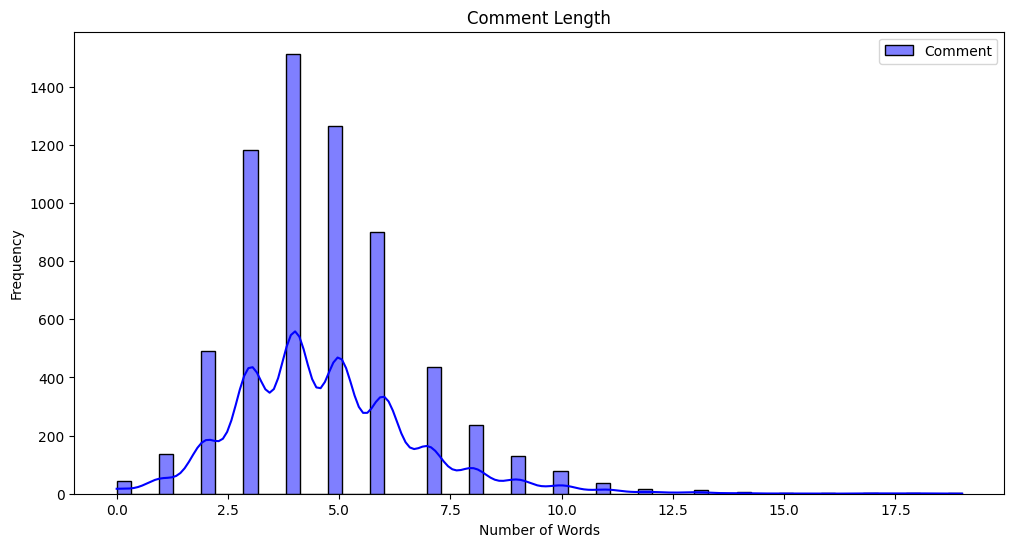

([('অভ নয', 56),
  ('গল পট', 56),
  ('অস রণ', 51),
  ('নষ হয়', 41),
  ('কর হয়', 40),
  ('অন কম', 37),
  ('অভ নয়', 36),
  ('কর মচ', 32),
  ('মন হচ', 29),
  ('ইঞ নট', 27)],
 [('ইন সটল কর', 14),
  ('অন শব কর', 10),
  ('পর ছন নত', 9),
  ('পর শও অন', 7),
  ('কর মচ অন', 7),
  ('ইন পট মন', 6),
  ('পট মন টর', 6),
  ('এন রট নম', 6),
  ('সটল কর হয়', 6),
  ('সব অভ নয়', 6)])

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
nltk.download('punkt')

df_eda = expanded_df.copy()

# Function to calculate the length of headlines and content
def calculate_lengths(df):
    df['comment_length'] = df['Comment'].apply(lambda x: len(nltk.word_tokenize(x)))

# Function to get n-grams from text
def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Calculate headline and content length for both datasets
calculate_lengths(df_eda)

# Prepare data for analysis
comment_lengths = {
    'Comment': df_eda['comment_length'],
}

# Extract bigrams and trigrams from headlines and content
top_bigrams = get_top_ngrams(df_eda['Comment'], n=10, ngram_range=(2, 2))
top_trigrams = get_top_ngrams(df_eda['Comment'], n=10, ngram_range=(3, 3))

# Plotting the histogram for headline lengths
plt.figure(figsize=(12, 6))
sns.histplot(comment_lengths['Comment'], label='Comment', color='blue', kde=True)
plt.title('Comment Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Displaying the top 10 bigrams and trigrams for both authentic and fake headlines
top_bigrams, top_trigrams


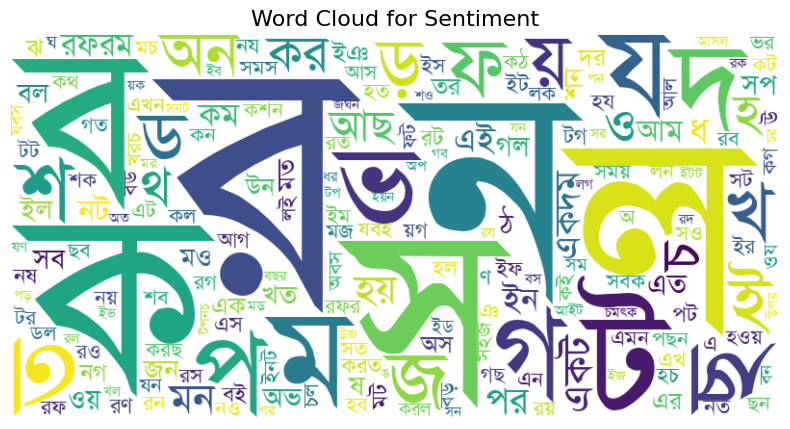

In [27]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the content from both datasets for the word cloud
combined_content_bangla = ' '.join(df_eda['Comment'].astype(str))

# Assuming the font is located at '/path/to/BanglaFont.ttf'
wordcloud_bangla = WordCloud(width=800, height=400, background_color='white',
                             collocations=False, font_path='/kaggle/input/bangla-font/SolaimanLipi.ttf').generate(combined_content_bangla)

# Plotting the word cloud for Bangla content
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bangla, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Sentiment", fontsize=16)
plt.show()

In [28]:
df_eda['comment_length'].describe()

count    6498.000000
mean        4.674515
std         2.038290
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        19.000000
Name: comment_length, dtype: float64

In [29]:
import spacy
nlp = spacy.load('en_core_web_sm')
df_eda['pos_tags'] = df_eda['Comment'].apply(lambda x: [token.pos_ for token in nlp(x)])

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [30]:
df_eda['pos_tags']

0                                [PUNCT, PROPN, PROPN, X]
1                       [PUNCT, NOUN, ADV, X, NOUN, NOUN]
2                    [INTJ, NOUN, ADJ, PROPN, INTJ, NOUN]
3                              [PROPN, PROPN, NOUN, NOUN]
4                    [PROPN, NOUN, PUNCT, VERB, PROPN, X]
                              ...                        
7158                           [PROPN, PUNCT, NOUN, NOUN]
7159                   [VERB, ADJ, PROPN, PROPN, X, NOUN]
7160    [PROPN, AUX, VERB, PROPN, PROPN, PROPN, PROPN,...
7161                     [PUNCT, PROPN, PRON, X, X, VERB]
7162                                [PROPN, PROPN, PROPN]
Name: pos_tags, Length: 6498, dtype: object

In [31]:
from textblob import TextBlob
df_eda['sentiment'] = df_eda['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [32]:
df_eda['sentiment']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7158    0.0
7159    0.0
7160    0.0
7161    0.0
7162    0.0
Name: sentiment, Length: 6498, dtype: float64

In [33]:
df_eda

,Comment,Aspect,Sentiment,comment_length,pos_tags,sentiment
0,হ্যান্ডব্রেকটা নষ্ট হয়ে গেছে,safety,negative,4,"[PUNCT, PROPN, PROPN, X]",0.0
1,নরমাল ব্রেক গুলা ঠিকই আছে।,safety,positive,5,"[PUNCT, NOUN, ADV, X, NOUN, NOUN]",0.0
2,লেদার সিটগুলা খুব একটা কমফরটেবল না,comfort,negative,6,"[INTJ, NOUN, ADJ, PROPN, INTJ, NOUN]",0.0
3,গাড়িটার কেবিনটা সুন্দর।,interior,positive,3,"[PROPN, PROPN, NOUN, NOUN]",0.0
4,গাড়িটায় একদম নিউ কালার করা হয়েছে,exterior,positive,6,"[PROPN, NOUN, PUNCT, VERB, PROPN, X]",0.0
...,...,...,...,...,...,...
7158,এই রেস্তোরাঁর খাবার ভালো,food,positive,4,"[PROPN, PUNCT, NOUN, NOUN]",0.0
7159,কর্মীরা খুব একটা দক্ষ নয়।,miscellaneous,negative,5,"[VERB, ADJ, PROPN, PROPN, X, NOUN]",0.0
7160,আমি এর আগে ওয়েটারদের কাছ থেকে এত দুর্দান্ত পর...,service,positive,10,"[PROPN, AUX, VERB, PROPN, PROPN, PROPN, PROPN,...",0.0
7161,তাদের খাবারের মানও খারাপ নয়।,food,positive,5,"[PUNCT, PROPN, PRON, X, X, VERB]",0.0


In [34]:
stopwords = [
    'অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আছে', 'আত্মা', 'আদ্যভাগে',
    'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উক্ত', 'উনি',
    'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একে', 'একটি', 'একবার', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা',
    'এটাই', 'এটি', 'এত', 'এতটাই', 'এদের', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওদের',
    'ওর', 'ওরা', 'কত', 'কবে', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করানো', 'করায়', 'করি', 'করিয়া', 'করিয়ে',
    'করেছে', 'করেছেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কী', 'কে', 'কেউ',
    'কেউই', 'কেন', 'কখনও', 'কত', 'কয়েক', 'কয়েকটি', 'ক্ষেত্রে', 'খুব', 'গিয়ে', 'গিয়েছে', 'গিয়েছিল', 'গেছে', 'চলে',
    'চান', 'চেয়ে', 'ছাড়া', 'ছাড়াও', 'ছিল', 'ছিলেন', 'জন্য', 'জন্যে', 'জানতে', 'জানায়', 'জানানো', 'জানিয়ে', 'জানি',
    'জানিয়ে', 'তখন', 'তবে', 'তবু', 'তাহলে', 'তাহার', 'তাদের', 'তার', 'তারপর', 'তারা', 'তাহা', 'তাকে', 'তাহাতে', 'তুমি',
    'তুলে', 'থাকে', 'থাকেন', 'থাকায়', 'থেকে', 'থেকেই', 'থেকেছে', 'থেকে', 'দিই', 'দিয়ে', 'দিয়ে', 'দেন', 'দেখা', 'দেখে',
    'দেয়', 'দেওয়া', 'দেওয়া হয়', 'দেওয়ার', 'ধরা', 'ধরে', 'নয়', 'নাকি', 'নাগাদ', 'নানা', 'নিয়ে', 'নিজে', 'নিজেই',
    'নিজেদের', 'নিজের', 'নতুন', 'নির্বাচিত', 'নীচের', 'নেকি', 'পক্ষে', 'পর', 'পরে', 'পরেই', 'পর্যন্ত', 'পাওয়া', 'পাচ্ছে',
    'পারি', 'পারি না', 'পারে', 'পূর্ব', 'প্রতি', 'প্রথম', 'প্রভৃতি', 'প্রযন্ত', 'প্রায়', 'ফের', 'বহু', 'বলা', 'বলতে',
    'বলল', 'বললেন', 'বলে', 'বলেই', 'বলেছেন', 'বলছিল', 'বলছেন', 'বসে', 'বহু', 'বসে', 'বহুমান', 'ভাবে', 'ভাবেই', 'মধ্য',
    'মধ্যেও', 'মধ্যে', 'মাত্র', 'মনে', 'মত', 'মতো', 'যখন', 'যদি', 'যদিও', 'যা', 'যাকে', 'যাচ্ছে', 'যাতে', 'যেন', 'যে',
    'যেতে', 'যায়', 'যারা', 'যাকে', 'যে', 'যেখানে', 'যেতে', 'যথেষ্ট', 'যদি', 'যা', 'রাখা', 'রাখার', 'রেখে', 'শুধু',
    'শুরু', 'সঙ্গে', 'সঙ্গেও', 'সমস্ত', 'সম্প্রতি', 'সহ', 'সহিত', 'সাধারণ', 'সুতরাং', 'সে', 'সেই', 'সেখান', 'সেখানে',
    'স্বয়ং', 'হইতে', 'হইবে', 'হইয়া', 'হওয়া', 'হওয়ার', 'হচ্ছে', 'হচ্ছি', 'হবেন', 'হয়ে', 'হয়েছে', 'হয়েছেন', 'হয়তো',
    'হল', 'হলে', 'হলেই', 'হলো'
]

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk


# Custom Tokenizer that removes stop words
def custom_tokenizer(text):
    tokens = text.split()
    return [word for word in tokens if word not in stopwords]

# Vectorize the Bangla text
vectorizer = CountVectorizer(stop_words=stopwords, tokenizer=custom_tokenizer)
X = vectorizer.fit_transform(df_eda['Comment'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Display topics
terms = vectorizer.get_feature_names_out()
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index+1}:")
    print([terms[i] for i in topic.argsort()[-5:]])  # Show top 5 words for each topic


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['না', 'হয়'] not in stop_words.
  warnings.warn(


Topic #1:
['গাড়িটা', 'খাবারের', 'দাম', 'বেশি', 'ভালো']
Topic #2:
['একদম', 'না।', 'ভালো', 'না', 'ফোনের']


In [36]:
import re

# Comprehensive list of Bangla stopwords
stopwords = {
    'অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আছে', 'আত্মা', 'আদ্যভাগে',
    'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উক্ত', 'উনি',
    'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একে', 'একটি', 'একবার', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা',
    'এটাই', 'এটি', 'এত', 'এতটাই', 'এদের', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওদের',
    'ওর', 'ওরা', 'কত', 'কবে', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করানো', 'করায়', 'করি', 'করিয়া', 'করিয়ে',
    'করেছে', 'করেছেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কী', 'কে', 'কেউ',
    'কেউই', 'কেন', 'কখনও', 'কত', 'কয়েক', 'কয়েকটি', 'ক্ষেত্রে', 'খুব', 'গিয়ে', 'গিয়েছে', 'গিয়েছিল', 'গেছে', 'চলে',
    'চান', 'চেয়ে', 'ছাড়া', 'ছাড়াও', 'ছিল', 'ছিলেন', 'জন্য', 'জন্যে', 'জানতে', 'জানায়', 'জানানো', 'জানিয়ে', 'জানি',
    'জানিয়ে', 'তখন', 'তবে', 'তবু', 'তাহলে', 'তাহার', 'তাদের', 'তার', 'তারপর', 'তারা', 'তাহা', 'তাকে', 'তাহাতে', 'তুমি',
    'তুলে', 'থাকে', 'থাকেন', 'থাকায়', 'থেকে', 'থেকেই', 'থেকেছে', 'থেকে', 'দিই', 'দিয়ে', 'দিয়ে', 'দেন', 'দেখা', 'দেখে',
    'দেয়', 'দেওয়া', 'দেওয়া হয়', 'দেওয়ার', 'ধরা', 'ধরে', 'নয়', 'নাকি', 'নাগাদ', 'নানা', 'নিয়ে', 'নিজে', 'নিজেই',
    'নিজেদের', 'নিজের', 'নতুন', 'নির্বাচিত', 'নীচের', 'নেকি', 'পক্ষে', 'পর', 'পরে', 'পরেই', 'পর্যন্ত', 'পাওয়া', 'পাচ্ছে',
    'পারি', 'পারি না', 'পারে', 'পূর্ব', 'প্রতি', 'প্রথম', 'প্রভৃতি', 'প্রযন্ত', 'প্রায়', 'ফের', 'বহু', 'বলা', 'বলতে',
    'বলল', 'বললেন', 'বলে', 'বলেই', 'বলেছেন', 'বলছিল', 'বলছেন', 'বসে', 'বহু', 'বসে', 'বহুমান', 'ভাবে', 'ভাবেই', 'মধ্য',
    'মধ্যেও', 'মধ্যে', 'মাত্র', 'মনে', 'মত', 'মতো', 'যখন', 'যদি', 'যদিও', 'যা', 'যাকে', 'যাচ্ছে', 'যাতে', 'যেন', 'যে',
    'যেতে', 'যায়', 'যারা', 'যাকে', 'যে', 'যেখানে', 'যেতে', 'যথেষ্ট', 'যদি', 'যা', 'রাখা', 'রাখার', 'রেখে', 'শুধু',
    'শুরু', 'সঙ্গে', 'সঙ্গেও', 'সমস্ত', 'সম্প্রতি', 'সহ', 'সহিত', 'সাধারণ', 'সুতরাং', 'সে', 'সেই', 'সেখান', 'সেখানে',
    'স্বয়ং', 'হইতে', 'হইবে', 'হইয়া', 'হওয়া', 'হওয়ার', 'হচ্ছে', 'হচ্ছি', 'হবেন', 'হয়ে', 'হয়েছে', 'হয়েছেন', 'হয়তো',
    'হল', 'হলে', 'হলেই', 'হলো'
}

# Punctuations and digits in Bangla
punctuations = r"[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।]"
digits = r"\d+"
letters = r"[a-zA-Z]"

def tokenize(text):
    # Splitting the text by spaces
    return text.split()

def clean_text(text):
    # Tokenize the text
    tokens = tokenize(text)

    # Filter the tokens
    filtered = []
    for token in tokens:
        if token in stopwords:
            continue

        # Remove punctuations and digits from tokens
        token_clean = re.sub(punctuations, "", token)
        token_clean = re.sub(digits, "", token_clean)
        token_clean = re.sub(letters, "", token_clean)

        if token_clean:  # Only append if the token is not empty after cleaning
            filtered.append(token_clean)

    return " ".join(filtered)

# Assuming 'df_eda' is the DataFrame and 'clean_text' is the function to clean the text
for i in range(10):
    print(f"********** Before (Text {i+1}) ***************")
    text = df_eda.iloc[i]['Comment']
    print(text)
    
    print(f"\n********** After (Text {i+1}) ***************")
    print(clean_text(text))
    print("\n" + "="*50 + "\n")



********** Before (Text 1) ***************
হ্যান্ডব্রেকটা নষ্ট হয়ে গেছে

********** After (Text 1) ***************
হ্যান্ডব্রেকটা নষ্ট হয়ে


********** Before (Text 2) ***************
নরমাল ব্রেক গুলা ঠিকই আছে।

********** After (Text 2) ***************
নরমাল ব্রেক গুলা ঠিকই আছে


********** Before (Text 3) ***************
লেদার সিটগুলা খুব একটা কমফরটেবল না

********** After (Text 3) ***************
লেদার সিটগুলা একটা কমফরটেবল না


********** Before (Text 4) ***************
গাড়িটার কেবিনটা সুন্দর।

********** After (Text 4) ***************
গাড়িটার কেবিনটা সুন্দর


********** Before (Text 5) ***************
গাড়িটায় একদম নিউ কালার করা হয়েছে

********** After (Text 5) ***************
গাড়িটায় একদম নিউ কালার করা হয়েছে


********** Before (Text 6) ***************
এই কালার কয়দিন টিকবে তার কোনো গ্যারান্টি নাই।

********** After (Text 6) ***************
কালার কয়দিন টিকবে কোনো গ্যারান্টি নাই


********** Before (Text 7) ***************
ইঞ্জিনে পারফরমেন্স হেডার লাগানো আছে

********** After (Text 

In [37]:
expanded_df['cleaned_comment'] = expanded_df.Comment.apply(clean_text)

In [38]:
expanded_df['cleaned_comment']

0                         হ্যান্ডব্রেকটা নষ্ট হয়ে
1                       নরমাল ব্রেক গুলা ঠিকই আছে
2                  লেদার সিটগুলা একটা কমফরটেবল না
3                          গাড়িটার কেবিনটা সুন্দর
4                গাড়িটায় একদম নিউ কালার করা হয়েছে
                          ...                    
7158                        রেস্তোরাঁর খাবার ভালো
7159                        কর্মীরা একটা দক্ষ নয়
7160    এর আগে ওয়েটারদের দুর্দান্ত পরিষেবা পাইনি
7161                       খাবারের মানও খারাপ নয়
7162                                গুণগত মান ভাল
Name: cleaned_comment, Length: 6498, dtype: object

In [39]:
final_df = expanded_df[['cleaned_comment', 'Aspect', 'Sentiment']]
final_df.describe

<bound method NDFrame.describe of                                 cleaned_comment         Aspect Sentiment
0                       হ্যান্ডব্রেকটা নষ্ট হয়ে         safety  negative
1                     নরমাল ব্রেক গুলা ঠিকই আছে         safety  positive
2                লেদার সিটগুলা একটা কমফরটেবল না        comfort  negative
3                        গাড়িটার কেবিনটা সুন্দর       interior  positive
4              গাড়িটায় একদম নিউ কালার করা হয়েছে       exterior  positive
...                                         ...            ...       ...
7158                      রেস্তোরাঁর খাবার ভালো           food  positive
7159                      কর্মীরা একটা দক্ষ নয়  miscellaneous  negative
7160  এর আগে ওয়েটারদের দুর্দান্ত পরিষেবা পাইনি        service  positive
7161                     খাবারের মানও খারাপ নয়           food  positive
7162                              গুণগত মান ভাল           food  positive

[6498 rows x 3 columns]>

In [40]:
file_path = '/kaggle/working/final_df1.csv'  # Adjust the path if needed
final_df.to_csv(file_path, index=False)

In [41]:
misspellings = {
    'positiive': 'positive',
    'positiveperformance': 'positive',
    'positivel': 'positive',
    'postive': 'positive',
    'positive.food': 'positive',
    'psoitive': 'positive',
    'negative': 'negative',
    'negative,': 'negative',
    'positive': 'positive',
    'positive,': 'positive',
    'Positive': 'positive',
    'positive,performance': 'positive',
    'neutral': 'neutral',
}

# Replace Sentiments in the DataFrame
final_df['Sentiment'] = final_df['Sentiment'].replace(misspellings)
final_df['Sentiment'] = final_df['Sentiment'].fillna('neutral')

# Display the DataFrame
print(final_df)


                                cleaned_comment         Aspect Sentiment
0                       হ্যান্ডব্রেকটা নষ্ট হয়ে         safety  negative
1                     নরমাল ব্রেক গুলা ঠিকই আছে         safety  positive
2                লেদার সিটগুলা একটা কমফরটেবল না        comfort  negative
3                        গাড়িটার কেবিনটা সুন্দর       interior  positive
4              গাড়িটায় একদম নিউ কালার করা হয়েছে       exterior  positive
...                                         ...            ...       ...
7158                      রেস্তোরাঁর খাবার ভালো           food  positive
7159                      কর্মীরা একটা দক্ষ নয়  miscellaneous  negative
7160  এর আগে ওয়েটারদের দুর্দান্ত পরিষেবা পাইনি        service  positive
7161                     খাবারের মানও খারাপ নয়           food  positive
7162                              গুণগত মান ভাল           food  positive

[6498 rows x 3 columns]


<ipython-input-41-57b074fa72cf>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Sentiment'] = final_df['Sentiment'].replace(misspellings)
<ipython-input-41-57b074fa72cf>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Sentiment'] = final_df['Sentiment'].fillna('neutral')


In [42]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label encoding
aspect_encoder = LabelEncoder()
sentiment_encoder = LabelEncoder()

final_df['aspect_label'] = aspect_encoder.fit_transform(final_df['Aspect'])
final_df['sentiment_label'] = sentiment_encoder.fit_transform(final_df['Sentiment'])

# Example encoding
final_df.head()

,cleaned_comment,Aspect,Sentiment,aspect_label,sentiment_label
0,হ্যান্ডব্রেকটা নষ্ট হয়ে,safety,negative,19,1
1,নরমাল ব্রেক গুলা ঠিকই আছে,safety,positive,19,3
2,লেদার সিটগুলা একটা কমফরটেবল না,comfort,negative,5,1
3,গাড়িটার কেবিনটা সুন্দর,interior,positive,10,3
4,গাড়িটায় একদম নিউ কালার করা হয়েছে,exterior,positive,8,3


In [48]:
data = final_df.copy()

In [50]:
import pandas as pd
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels
aspect_encoder = LabelEncoder()
sentiment_encoder = LabelEncoder()

data["aspect_label"] = aspect_encoder.fit_transform(data["Aspect"])
data["sentiment_label"] = sentiment_encoder.fit_transform(data["Sentiment"])

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("sagorsarker/bangla-bert-base")

# Tokenize dataset
MAX_LENGTH = 128

def tokenize_data(row):
    return tokenizer(
        row['cleaned_comment'],
        padding='max_length',
        truncation=True,
        max_length=MAX_LENGTH,
        return_tensors="pt"
    )

# Split data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Tokenize train and test sets
train_encodings = tokenizer(
    train_data["cleaned_comment"].tolist(),
    padding=True,
    truncation=True,
    max_length=MAX_LENGTH,
    return_tensors="pt"
)

test_encodings = tokenizer(
    test_data["cleaned_comment"].tolist(),
    padding=True,
    truncation=True,
    max_length=MAX_LENGTH,
    return_tensors="pt"
)
train_encodings

{'input_ids': tensor([[  101, 16359,  5803,  ...,     0,     0,     0],
        [  101,  2552,  9740,  ...,     0,     0,     0],
        [  101,  6072, 43245,  ...,     0,     0,     0],
        ...,
        [  101, 43996,  2095,  ...,     0,     0,     0],
        [  101,  2063,  7590,  ...,     0,     0,     0],
        [  101,  6123, 26390,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [52]:
import torch
from torch.utils.data import Dataset

class BanglaDataset(Dataset):
    def __init__(self, encodings, aspect_labels, sentiment_labels):
        self.encodings = encodings
        self.aspect_labels = aspect_labels
        self.sentiment_labels = sentiment_labels

    def __len__(self):
        return len(self.aspect_labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['aspect_labels'] = torch.tensor(self.aspect_labels[idx])
        item['sentiment_labels'] = torch.tensor(self.sentiment_labels[idx])
        return item

train_dataset = BanglaDataset(
    train_encodings, 
    train_data["aspect_label"].tolist(), 
    train_data["sentiment_label"].tolist()
)

test_dataset = BanglaDataset(
    test_encodings, 
    test_data["aspect_label"].tolist(), 
    test_data["sentiment_label"].tolist()
)


In [72]:
from transformers import AutoModelForSequenceClassification, AdamW
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm
import time
import numpy as np

# Load model
model = AutoModelForSequenceClassification.from_pretrained(
    "sagorsarker/bangla-bert-base", 
    num_labels=len(aspect_encoder.classes_) + len(sentiment_encoder.classes_)
)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define criterion
criterion = nn.CrossEntropyLoss()

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Initialize variables
train_loss_data, valid_loss_data = [], []
valid_loss_min = np.Inf
since = time.time()
best_loss = np.inf

# Training loop
for epoch in range(10):  # Number of epochs
    print(f"Epoch: {epoch + 1}/10")
    model.train()
    
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch + 1}")

    for batch in progress_bar:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        aspect_labels = batch['aspect_labels'].to(device)
        sentiment_labels = batch['sentiment_labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Split logits into aspect and sentiment
        aspect_logits, sentiment_logits = torch.split(
            logits, 
            [len(aspect_encoder.classes_), len(sentiment_encoder.classes_)],
            dim=1
        )

        # Compute losses
        aspect_loss = criterion(aspect_logits, aspect_labels)
        sentiment_loss = criterion(sentiment_logits, sentiment_labels)
        loss = aspect_loss + sentiment_loss

        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        # Calculate accuracy for training
        aspect_preds = torch.argmax(aspect_logits, dim=1)
        sentiment_preds = torch.argmax(sentiment_logits, dim=1)
        
        correct_train += (aspect_preds == aspect_labels).sum().item()
        correct_train += (sentiment_preds == sentiment_labels).sum().item()
        total_train += aspect_labels.size(0) + sentiment_labels.size(0)

        progress_bar.set_postfix(loss=loss.item(), accuracy=correct_train / total_train)

    train_accuracy = correct_train / total_train
    print(f"Train Loss: {train_loss / len(train_loader):.4f} | Train Accuracy: {train_accuracy * 100:.2f}%")

    # Validation step
    model.eval()
    valid_loss = 0.0
    correct_valid = 0
    total_valid = 0

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            aspect_labels = batch['aspect_labels'].to(device)
            sentiment_labels = batch['sentiment_labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            # Split logits into aspect and sentiment
            aspect_logits, sentiment_logits = torch.split(
                logits, 
                [len(aspect_encoder.classes_), len(sentiment_encoder.classes_)],
                dim=1
            )

            # Compute losses
            aspect_loss = criterion(aspect_logits, aspect_labels)
            sentiment_loss = criterion(sentiment_logits, sentiment_labels)
            loss = aspect_loss + sentiment_loss
            valid_loss += loss.item()

            # Calculate accuracy for validation
            aspect_preds = torch.argmax(aspect_logits, dim=1)
            sentiment_preds = torch.argmax(sentiment_logits, dim=1)

            correct_valid += (aspect_preds == aspect_labels).sum().item()
            correct_valid += (sentiment_preds == sentiment_labels).sum().item()
            total_valid += aspect_labels.size(0) + sentiment_labels.size(0)

    valid_accuracy = correct_valid / total_valid
    print(f"Validation Loss: {valid_loss / len(test_loader):.4f} | Validation Accuracy: {valid_accuracy * 100:.2f}%")

    # Save the best model checkpoint based on validation loss
    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("Best model saved!")

    # Track loss data for plotting or further analysis
    train_loss_data.append(train_loss / len(train_loader))
    valid_loss_data.append(valid_loss / len(test_loader))

# Calculate total time elapsed
time_elapsed = time.time() - since
print(f"Training completed in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch: 1/10


Training Epoch 1: 100%|██████████| 650/650 [00:59<00:00, 10.96it/s, accuracy=0.62, loss=1.93]  


Train Loss: 2.2532 | Train Accuracy: 62.02%
Validation Loss: 1.6369 | Validation Accuracy: 73.04%
Best model saved!
Epoch: 2/10


Training Epoch 2: 100%|██████████| 650/650 [00:59<00:00, 10.99it/s, accuracy=0.785, loss=0.734]


Train Loss: 1.3194 | Train Accuracy: 78.54%
Validation Loss: 1.4614 | Validation Accuracy: 77.04%
Best model saved!
Epoch: 3/10


Training Epoch 3: 100%|██████████| 650/650 [00:59<00:00, 10.96it/s, accuracy=0.847, loss=0.869]


Train Loss: 0.9354 | Train Accuracy: 84.74%
Validation Loss: 1.4745 | Validation Accuracy: 77.04%
Epoch: 4/10


Training Epoch 4: 100%|██████████| 650/650 [00:59<00:00, 10.97it/s, accuracy=0.886, loss=0.892] 


Train Loss: 0.6932 | Train Accuracy: 88.64%
Validation Loss: 1.3872 | Validation Accuracy: 78.81%
Best model saved!
Epoch: 5/10


Training Epoch 5: 100%|██████████| 650/650 [00:59<00:00, 10.96it/s, accuracy=0.908, loss=0.241] 


Train Loss: 0.5639 | Train Accuracy: 90.82%
Validation Loss: 1.5076 | Validation Accuracy: 78.65%
Epoch: 6/10


Training Epoch 6: 100%|██████████| 650/650 [00:59<00:00, 10.96it/s, accuracy=0.924, loss=0.959] 


Train Loss: 0.4756 | Train Accuracy: 92.39%
Validation Loss: 1.5047 | Validation Accuracy: 79.04%
Epoch: 7/10


Training Epoch 7: 100%|██████████| 650/650 [00:59<00:00, 10.97it/s, accuracy=0.93, loss=0.379]  


Train Loss: 0.4269 | Train Accuracy: 92.99%
Validation Loss: 1.5639 | Validation Accuracy: 78.85%
Epoch: 8/10


Training Epoch 8: 100%|██████████| 650/650 [00:59<00:00, 10.96it/s, accuracy=0.941, loss=0.914] 


Train Loss: 0.3715 | Train Accuracy: 94.07%
Validation Loss: 1.6499 | Validation Accuracy: 77.96%
Epoch: 9/10


Training Epoch 9: 100%|██████████| 650/650 [00:59<00:00, 10.97it/s, accuracy=0.948, loss=0.0264]


Train Loss: 0.3187 | Train Accuracy: 94.78%
Validation Loss: 1.6605 | Validation Accuracy: 79.08%
Epoch: 10/10


Training Epoch 10: 100%|██████████| 650/650 [00:59<00:00, 10.98it/s, accuracy=0.949, loss=0.0346] 


Train Loss: 0.3192 | Train Accuracy: 94.91%
Validation Loss: 1.7094 | Validation Accuracy: 79.73%
Training completed in 10m 24s


In [73]:
from sklearn.metrics import classification_report

model.eval()
all_aspect_preds, all_sentiment_preds = [], []
all_aspect_labels, all_sentiment_labels = [], []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        aspect_labels = batch['aspect_labels'].to(device)
        sentiment_labels = batch['sentiment_labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        aspect_logits, sentiment_logits = torch.split(
            logits, 
            [len(aspect_encoder.classes_), len(sentiment_encoder.classes_)],
            dim=1
        )

        # Predictions
        aspect_preds = torch.argmax(aspect_logits, dim=1)
        sentiment_preds = torch.argmax(sentiment_logits, dim=1)

        all_aspect_preds.extend(aspect_preds.cpu().numpy())
        all_sentiment_preds.extend(sentiment_preds.cpu().numpy())
        all_aspect_labels.extend(aspect_labels.cpu().numpy())
        all_sentiment_labels.extend(sentiment_labels.cpu().numpy())

# Classification reports
print("Aspect Classification Report:")
print(classification_report(all_aspect_labels, all_aspect_preds, target_names=aspect_encoder.classes_[:-1]))

print("\nSentiment Classification Report:")
print(classification_report(all_sentiment_labels, all_sentiment_preds, target_names=sentiment_encoder.classes_[1:]))


Evaluating: 100%|██████████| 163/163 [00:02<00:00, 61.56it/s]

Aspect Classification Report:
               precision    recall  f1-score   support

        Story       0.00      0.00      0.00         1
  accessories       0.72      0.84      0.77        43
     ambiance       0.71      0.56      0.63        36
      battery       0.81      0.92      0.86        48
       camera       1.00      0.88      0.93        40
      comfort       0.78      0.82      0.80        60
       design       0.89      0.87      0.88        39
      display       0.93      0.90      0.92        31
     exterior       0.98      0.81      0.89        58
         food       0.94      0.78      0.85       112
     interior       0.95      0.89      0.92        44
miscellaneous       0.51      0.56      0.53        87
        music       0.90      0.84      0.87        44
       others       0.64      0.85      0.73       123
   performace       0.00      0.00      0.00         2
  performance       0.93      0.68      0.79       194
     positive       0.65      0.79


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
def predict(model, tokenizer, texts):
    encodings = tokenizer(
        texts, 
        padding=True, 
        truncation=True, 
        max_length=MAX_LENGTH, 
        return_tensors="pt"
    )
    encodings = {key: val.to(device) for key, val in encodings.items()}

    model.eval()
    with torch.no_grad():
        outputs = model(**encodings)
        logits = outputs.logits

        aspect_logits, sentiment_logits = torch.split(
            logits, 
            [len(aspect_encoder.classes_), len(sentiment_encoder.classes_)],
            dim=1
        )

        aspect_preds = torch.argmax(aspect_logits, dim=1)
        sentiment_preds = torch.argmax(sentiment_logits, dim=1)

    return (
        aspect_encoder.inverse_transform(aspect_preds.cpu().numpy()),
        sentiment_encoder.inverse_transform(sentiment_preds.cpu().numpy())
    )

# Predict on new comments
new_comments = ["এই গাড়ির ব্রেক ঠিক আছে", "সিট কমফরটেবল না"]
aspects, sentiments = predict(model, tokenizer, new_comments)
for text, aspect, sentiment in zip(new_comments, aspects, sentiments):
    print(f"Text: {text}\nAspect: {aspect}, Sentiment: {sentiment}\n")


Text: এই গাড়ির ব্রেক ঠিক আছে
Aspect: safety, Sentiment: positive

Text: সিট কমফরটেবল না
Aspect: comfort, Sentiment: negative

